In [13]:
import pandas as pd

from sklearn.model_selection import train_test_split
from category_encoders import TargetEncoder

from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

from utils.evaluation import Evaluation

from sklearn.model_selection import GridSearchCV


pd.set_option("display.max_columns", None)

In [2]:
path = "data/diabetes_processed_dataset.csv"

df = pd.read_csv(path)

In [3]:
df.head()

,age,location,race:AfricanAmerican,race:Asian,race:Caucasian,race:Hispanic,race:Other,bmi,hbA1c_level,blood_glucose_level,diabetes,gender_Female,gender_Male,gender_Other,smoking_history_No Info,smoking_history_current,smoking_history_ever,smoking_history_former,smoking_history_never,smoking_history_not current,hypertension_0,hypertension_1,heart_disease_0,heart_disease_1
0,32.0,Alabama,0,0,0,0,1,27.32,5.0,100,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
1,29.0,Alabama,0,1,0,0,0,19.95,5.0,90,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
2,18.0,Alabama,0,0,0,0,1,23.76,4.8,160,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
3,41.0,Alabama,0,0,1,0,0,27.32,4.0,159,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0
4,52.0,Alabama,1,0,0,0,0,23.75,6.5,90,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,0.0


## Split and Target Encoding *location*

In [5]:
X = df.drop(['diabetes'], axis = 1)
y = df['diabetes']

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [7]:
encoder = TargetEncoder(cols=['location'])
X_train['location'] = encoder.fit_transform(X_train['location'], y_train)
X_test['location'] = encoder.transform(X_test['location'])

## Raw Prediction

In [14]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

### Evaluation

Accuracy: 0.9690


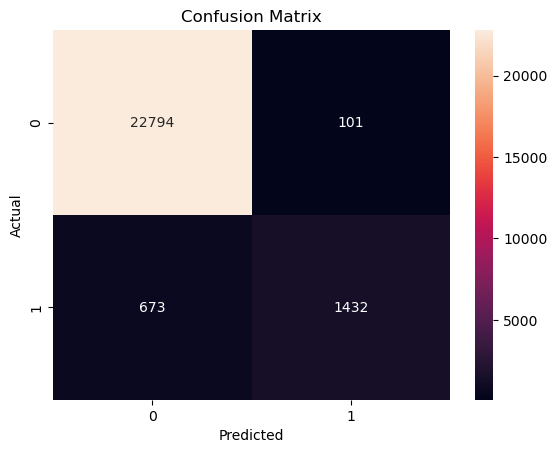

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22895
           1       0.93      0.68      0.79      2105

    accuracy                           0.97     25000
   macro avg       0.95      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



In [15]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)

## Tunning Prediction

In [19]:
param_grid = {
    'mlp__hidden_layer_sizes': [(50,), (100,), (50, 50)],
    'mlp__activation': ['relu', 'tanh'],
    'mlp__learning_rate_init': [0.001, 0.01],
    'mlp__max_iter': [200, 400]
}

In [20]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(random_state=42))
])

In [21]:
grid_search = GridSearchCV(pipeline, param_grid, n_jobs=1, cv=5, scoring='accuracy', verbose=2)
grid_search.fit(X_train, y_train)

print(f"Melhores parâmetros:\n {grid_search.best_params_}")

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  16.6s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  18.8s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  20.0s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  17.1s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  18.6s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time=  17.0s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time=  26.1s
[CV] END mlp__activat

/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  52.0s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  57.8s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  48.4s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  46.7s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  48.1s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.0min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.8min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.4min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time=  44.5s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.4min
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=  54.6s
[CV] END mlp__activation=relu, mlp__hidden_layer_sizes=(50, 50)

/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  27.2s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  25.9s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  28.0s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  28.0s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  31.1s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time=  40.9s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time=  37.1s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time=  33.5s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time=  33.8s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time=  46.1s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=  16.8s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50,), mlp__learning_rate_ini

/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  41.9s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  41.9s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  41.7s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  43.3s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  44.4s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.5min
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time=  59.7s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time=  38.6s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time=  52.4s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time=  58.2s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=  27.6s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=  23.2s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=  26.0s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=  20.8s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=  25.3s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.01, mlp__max_iter=400; total time=  26.2s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.01, mlp__max_iter=400; total time=  20.6s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.01, mlp__max_iter=400; total time=  28.6s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_init=0.01, mlp__max_iter=400; total time=  23.3s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(100,), mlp__learning_rate_i

/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  58.7s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  57.1s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  50.7s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  44.7s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=200; total time=  34.4s


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.2min


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.1min


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.0min


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.1min


/home/matt/anaconda3/envs/diabetes-prediction/lib/python3.10/site-packages/sklearn/neural_network/_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (400) reached and the optimization hasn't converged yet.
  warnings.warn(


[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.001, mlp__max_iter=400; total time= 1.1min
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=  25.7s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=  27.5s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=  23.0s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=10.6min
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.01, mlp__max_iter=200; total time=  21.6s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp__learning_rate_init=0.01, mlp__max_iter=400; total time=  15.8s
[CV] END mlp__activation=tanh, mlp__hidden_layer_sizes=(50, 50), mlp

### Final Prediction

In [22]:
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('mlp', MLPClassifier(activation='relu', hidden_layer_sizes=(50,), learning_rate_init=0.001, max_iter=200, random_state=42))
])

pipeline.fit(X_train, y_train)

y_pred = pipeline.predict(X_test)

### Evaluation

Accuracy: 0.9709


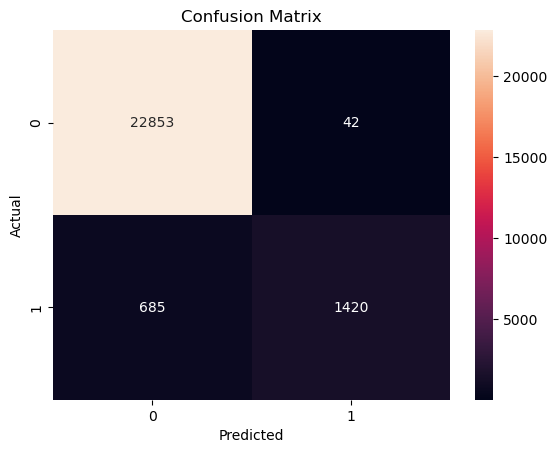

Classification Report:
              precision    recall  f1-score   support

           0       0.97      1.00      0.98     22895
           1       0.97      0.67      0.80      2105

    accuracy                           0.97     25000
   macro avg       0.97      0.84      0.89     25000
weighted avg       0.97      0.97      0.97     25000



In [23]:
eval = Evaluation()

eval.evaluate_model(y_test, y_pred)